In [1]:
import pandas as pd
import netCDF4 as nc
import datetime as dt
import subprocess
import requests
import matplotlib.pyplot as plt
import cmocean
import numpy as np
import os
import re
import dateutil as dutil
from salishsea_tools import viz_tools, places
import glob
import pickle
import matplotlib.dates as mdates
import matplotlib as mpl
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=16) 
mpl.rc('legend', fontsize=16) 
mpl.rc('axes', titlesize=16) 
mpl.rc('figure', titlesize=16) 
mpl.rc('axes', labelsize=16) 
mpl.rc('font', size=16) 

mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['legend.numpoints'] = 1
%matplotlib inline

In [10]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as fm:
    e3t_0=np.copy(fm.variables['e3t_0'])

In [6]:
saveloc='/data/eolson/MEOPAR/SS36runs/calcFiles/comparePhytoN/'
baseloc='/data/eolson/MEOPAR/SS36runs/CedarRuns/'
dirnames=('hindcast2015','hindcast2016','hindcast2017','hindcast2018')
plist=['S3',]
varNameDict={'Sentry Shoal':'SentryShoal', 'S3':'S3', 'Central node':'CentralNode', 'Central SJDF':'CentralSJDF'}
with open('/data/eolson/results/MEOPAR/analysis-elise-2/notebooks/bioTuning/spathsMaster.txt') as f:
    spaths = dict(x.strip().split() for x in f)
ff=dict()
for idir in dirnames:
    ff[idir]=dict()
    for pl in plist:
        print(spaths[idir]+'ts_'+idir+'_'+varNameDict[pl]+'.nc')
        ff[idir][pl]=nc.Dataset(spaths[idir]+'ts_'+idir+'_'+varNameDict[pl]+'.nc')

/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_hindcast2015_S3.nc
/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_hindcast2016_S3.nc
/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_hindcast2017_S3.nc
/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_hindcast2018_S3.nc


In [24]:
lcol={'hindcast2015':{'tot':'darkgreen',},'hindcast2016':{'tot':'k'},
      'hindcast2017':{'tot':'indigo',},'hindcast2018':{'tot':'darkorange',}}
lsty={'hindcast2015':'-','hindcast2016':'-','hindcast2017':'-','hindcast2018':'-'}

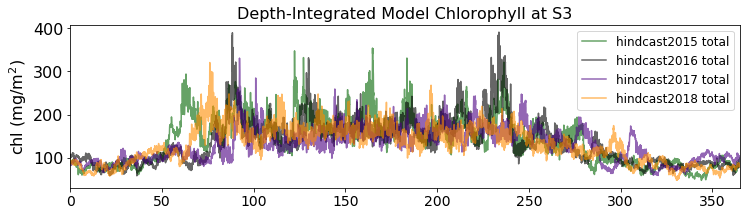

In [34]:
yearsFmt = mdates.DateFormatter('%b %d')
fig,ax=plt.subplots(1,1,figsize=(12,3*(len(plist))))
ax=[ax,]
pp=dict()
for ii in range(0,len(plist)):
    pl=plist[ii]
    pp[ii]=dict()
    for idir in dirnames:
        f=ff[idir][pl]
        try:
            pp[ii]['tot']=ax[ii].plot(np.arange(1,len(f.variables['diatoms'][:,0,0,0])+1)/24,
                                      2.0*np.sum((f.variables['diatoms'][:,:,0,0]+\
                                f.variables['flagellates'][:,:,0,0]+\
                                f.variables['ciliates'][:,:,0,0])*\
                        f.variables['e3t'][:,:,0,0],1),
                          linestyle=lsty[idir],color=lcol[idir]['tot'],alpha=.6,label=idir+' '+'total')
        except:
            pp[ii]['tot']=ax[ii].plot(np.arange(1,len(f.variables['diatoms'][:,0,0,0])+1)/24,
                            2.0*np.sum((f.variables['diatoms'][:,:,0,0]+\
                    f.variables['flagellates'][:,:,0,0]+f.variables['ciliates'][:,:,0,0])*\
                    np.tile(e3t_0[:,:,0,0],(len(f.variables['diatoms'][:,0,0,0]),1)),1),
                linestyle=lsty[idir],color=lcol[idir]['tot'],alpha=.6,label=idir+' '+'total')
    ax[ii].set_title('Depth-Integrated Model Chlorophyll at S3')
    ax[ii].set_ylabel('chl (mg/m$^2$)')
    ax[ii].set_xlim(0,365)
    #ax[ii].set_ylim(0,40)
    if ii==0:
        ax[0].legend(bbox_to_anchor=(1,1),fontsize=12)
    fig.savefig('IntChl.png')

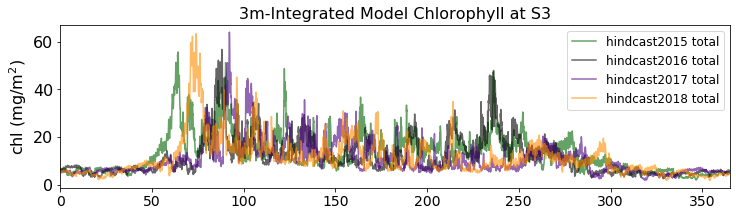

In [35]:
yearsFmt = mdates.DateFormatter('%b %d')
fig,ax=plt.subplots(1,1,figsize=(12,3*(len(plist))))
ax=[ax,]
pp=dict()
for ii in range(0,len(plist)):
    pl=plist[ii]
    pp[ii]=dict()
    for idir in dirnames:
        f=ff[idir][pl]
        try:
            pp[ii]['tot']=ax[ii].plot(np.arange(1,len(f.variables['diatoms'][:,0,0,0])+1)/24,
                                      2.0*np.sum((f.variables['diatoms'][:,:3,0,0]+\
                                f.variables['flagellates'][:,:3,0,0]+\
                                f.variables['ciliates'][:,:3,0,0])*\
                        f.variables['e3t'][:,:3,0,0],1),
                          linestyle=lsty[idir],color=lcol[idir]['tot'],alpha=.6,label=idir+' '+'total')
        except:
            pp[ii]['tot']=ax[ii].plot(np.arange(1,len(f.variables['diatoms'][:,0,0,0])+1)/24,
                            2.0*np.sum((f.variables['diatoms'][:,:3,0,0]+\
                    f.variables['flagellates'][:,:3,0,0]+f.variables['ciliates'][:,:3,0,0])*\
                    np.tile(e3t_0[:,:3,0,0],(len(f.variables['diatoms'][:,0,0,0]),1)),1),
                linestyle=lsty[idir],color=lcol[idir]['tot'],alpha=.6,label=idir+' '+'total')
    ax[ii].set_title('3m-Integrated Model Chlorophyll at S3')
    ax[ii].set_ylabel('chl (mg/m$^2$)')
    ax[ii].set_xlim(0,365)
    #ax[ii].set_ylim(0,40)
    if ii==0:
        ax[0].legend(bbox_to_anchor=(1,1),fontsize=12)
    fig.savefig('Int3mChl.png')

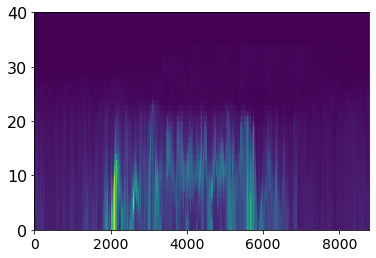

In [30]:
f=ff['hindcast2016']['S3']
plt.pcolormesh(np.array(f.variables['diatoms'][:,:,0,0]+f.variables['flagellates'][:,:,0,0]+f.variables['ciliates'][:,:,0,0]).T)

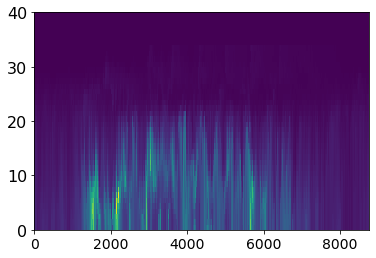

In [31]:
f=ff['hindcast2015']['S3']
plt.pcolormesh(np.array(f.variables['diatoms'][:,:,0,0]+f.variables['flagellates'][:,:,0,0]+f.variables['ciliates'][:,:,0,0]).T)